In [ ]:
# vehicle detection

In [ ]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 23.6 MB/s eta 0:00:00


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np

In [34]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16995, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 16995 (delta 101), reused 117 (delta 59), pack-reused 16805 (from 1)
Receiving objects: 100% (16995/16995), 15.73 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (11634/11634), done.


In [ ]:
!pwd

/content


In [ ]:
!cd yolov5 & pip install -r '/content/yolov5/requirements.txt'

In [ ]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-16 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
#Example

im = '/content/Screenshot 2024-10-16 150730.jpg'

# Inference
results = model(im)

results.pandas().xyxy[0]

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


,xmin,ymin,xmax,ymax,confidence,class,name
0,625.342163,540.067261,724.471924,620.301270,0.809239,2,car
1,12.586576,548.171631,92.441704,610.164917,0.785451,2,car
2,715.282715,558.096069,764.845398,588.127808,0.664261,2,car
3,3.266040,560.094543,32.509983,629.240051,0.538573,2,car
4,602.666992,550.631531,635.407776,569.936462,0.423868,2,car


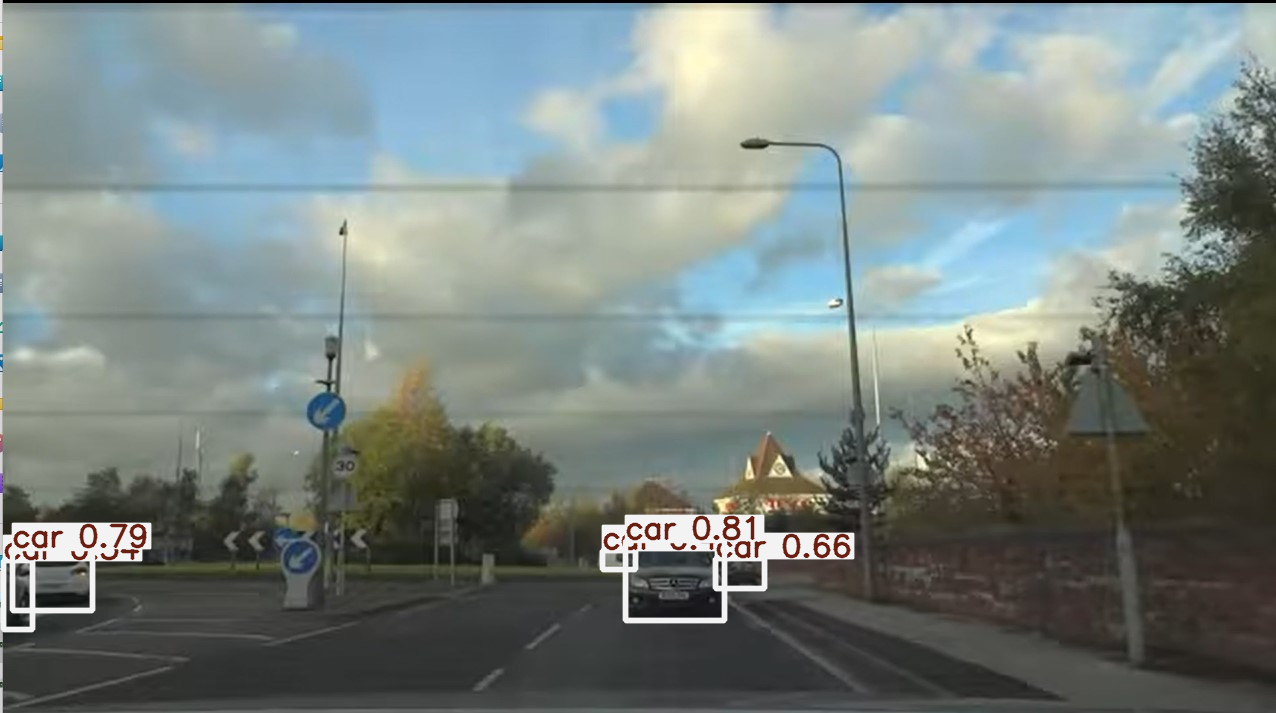

In [32]:
# Display the results directly
results.show()

In [35]:
for result in results.xyxy[0]:  # Each detected object in this list
    x_min, y_min, x_max, y_max, conf, cls = result  # Coordinates of the bounding box
    print(f'Bounding Box: {(x_min, y_min, x_max, y_max)}')

Bounding Box: (tensor(625.34216), tensor(540.06726), tensor(724.47192), tensor(620.30127))
Bounding Box: (tensor(12.58658), tensor(548.17163), tensor(92.44170), tensor(610.16492))
Bounding Box: (tensor(715.28271), tensor(558.09607), tensor(764.84540), tensor(588.12781))
Bounding Box: (tensor(3.26604), tensor(560.09454), tensor(32.50998), tensor(629.24005))
Bounding Box: (tensor(602.66699), tensor(550.63153), tensor(635.40778), tensor(569.93646))


In [36]:
sticker = cv2.imread('/content/R.png', -1)

In [37]:
frame = cv2.imread(im)

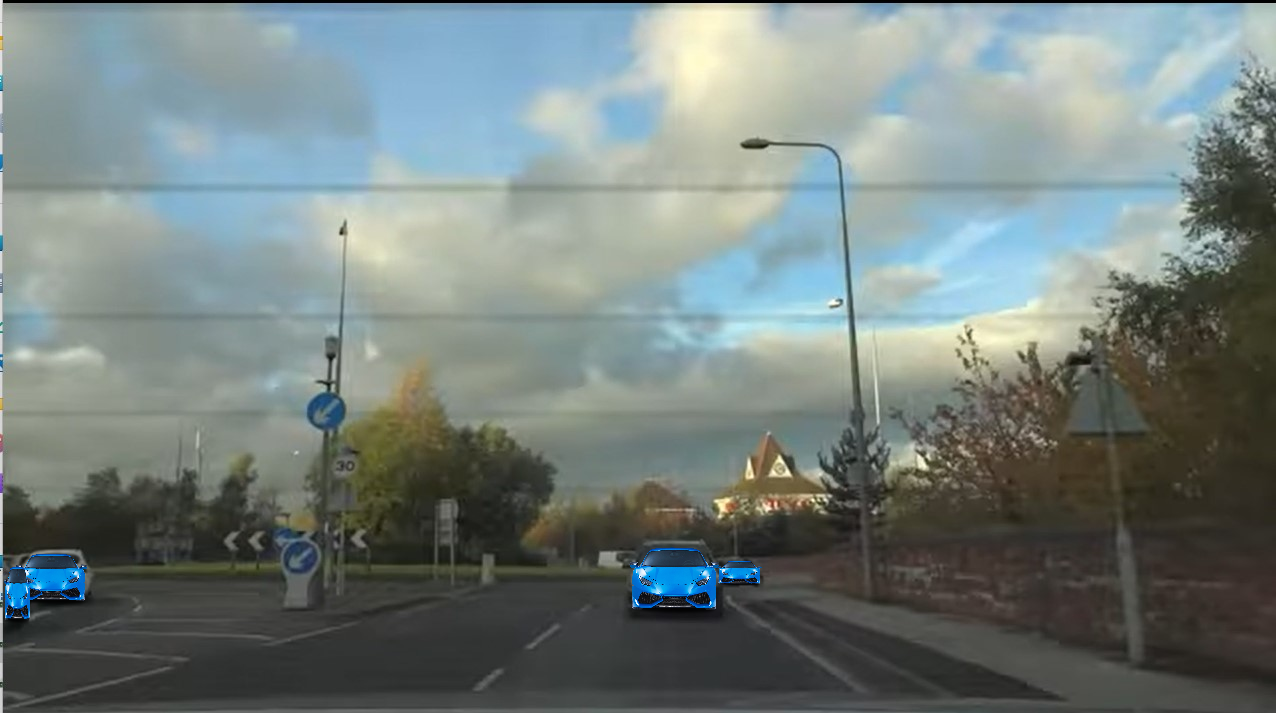

In [38]:
for result in results.xyxy[0]:
    x_min, y_min, x_max, y_max, conf, cls = result  # Extract bounding box and confidence
    if cls == 2 and conf > 0.5:
        bbox_x, bbox_y = int(x_min), int(y_min)
        bbox_width, bbox_height = int(x_max - x_min), int(y_max - y_min)

        resized_sticker = cv2.resize(sticker, (bbox_width, bbox_height))

        roi = frame[bbox_y:bbox_y + bbox_height, bbox_x:bbox_x + bbox_width]

        sticker_rgb = resized_sticker[:, :, :3]  # RGB channels
        sticker_alpha = resized_sticker[:, :, 3] / 255.0  # Alpha channel for blending

        # Overlay the sticker on the ROI using the alpha channel
        for c in range(0, 3):
            roi[:, :, c] = sticker_alpha * sticker_rgb[:, :, c] + (1 - sticker_alpha) * roi[:, :, c]

        # Place the modified ROI back into the original frame
        frame[bbox_y:bbox_y + bbox_height, bbox_x:bbox_x + bbox_width] = roi

# Display the final image with the sticker overlay
cv2_imshow(frame)  # This will display the image in Colab